In [1]:
import yfinance as yf
import pandas as pd

In [2]:
stock = 'GOOGL'  # Example: Google stock
start_date = '2015-01-01'
end_date = '2023-12-31'

data = yf.download(stock, start=start_date, end=end_date)
data.to_csv('stock_data.csv')  
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2015-01-02,26.381865,26.693236,26.298664,26.533812,26480000
2015-01-05,25.879185,26.304145,25.793995,26.262296,41182000
2015-01-06,25.240503,25.966370,25.186200,25.930999,54456000
2015-01-07,25.166269,25.482124,25.091541,25.455223,46918000
2015-01-08,25.253956,25.283348,24.661602,24.984931,73054000


In [3]:
import pandas as pd

# Load the data, skipping the first two rows
data = pd.read_csv('stock_data.csv', skiprows=2)

# Rename the columns to appropriate labels
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check the first few rows to confirm
print(data.head())


                Close       High        Low       Open    Volume
Date                                                            
2015-01-02  26.381865  26.693236  26.298664  26.533812  26480000
2015-01-05  25.879185  26.304145  25.793995  26.262296  41182000
2015-01-06  25.240503  25.966370  25.186200  25.930999  54456000
2015-01-07  25.166269  25.482124  25.091541  25.455223  46918000
2015-01-08  25.253956  25.283348  24.661602  24.984931  73054000


In [4]:
data_reset = data.reset_index()

data_reset.head()


,Date,Close,High,Low,Open,Volume
0,2015-01-02,26.381865,26.693236,26.298664,26.533812,26480000
1,2015-01-05,25.879185,26.304145,25.793995,26.262296,41182000
2,2015-01-06,25.240503,25.966370,25.186200,25.930999,54456000
3,2015-01-07,25.166269,25.482124,25.091541,25.455223,46918000
4,2015-01-08,25.253956,25.283348,24.661602,24.984931,73054000


In [5]:
# Check for missing data
print(data.isnull().sum())

data = data.fillna(data.mean())


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Scale the features (Close, High, Low, Open, Volume)
scaled_data = scaler.fit_transform(data[['Close', 'High', 'Low', 'Open', 'Volume']])

# Create a new dataframe with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=['Close', 'High', 'Low', 'Open', 'Volume'], index=data.index)


In [7]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = scaled_data_df[['High', 'Low', 'Open', 'Volume']]  # Features
y = scaled_data_df['Close']  # Target variable

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (1811, 4), Testing data shape: (453, 4)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
lr_predictions = lr_model.predict(X_test)

# Evaluate the model (optional)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.9770544684849376e-05
R-squared: 0.9974947275530294


In [10]:
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()

lstm_model.add(LSTM(units=100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))  # Output layer for prediction

lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

lstm_predictions = lstm_model.predict(X_test_lstm)

mse_lstm = mean_squared_error(y_test, lstm_predictions)
r2_lstm = r2_score(y_test, lstm_predictions)

print(f'LSTM Mean Squared Error: {mse_lstm}')
print(f'LSTM R-squared: {r2_lstm}')


Epoch 1/50


C:\Users\KIIT\anaconda3\Newfolder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1166 - mean_absolute_error: 0.2547 - mean_squared_error: 0.1166 - val_loss: 0.0133 - val_mean_absolute_error: 0.0988 - val_mean_squared_error: 0.0133
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 - mean_absolute_error: 0.0885 - mean_squared_error: 0.0115 - val_loss: 0.0047 - val_mean_absolute_error: 0.0581 - val_mean_squared_error: 0.0047
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mean_absolute_error: 0.0468 - mean_squared_error: 0.0036 - val_loss: 0.0016 - val_mean_absolute_error: 0.0331 - val_mean_squared_error: 0.0016
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - mean_absolute_error: 0.0322 - mean_squared_error: 0.0022 - val_loss: 8.2593e-04 - val_mean_absolute_error: 0.0238 - val_mean_squared_error: 8.2593e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0270 - mean_squared_error: 0.0016 - val_loss: 2.5196e-04 - val_mean_abso

In [12]:
# Fit the scaler only on the target variable (stock prices - 'Close')
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# Scale the features as before (with the previous scaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Assuming lstm_predictions is the model's predictions for the test data
lstm_predictions_rescaled = target_scaler.inverse_transform(lstm_predictions.reshape(-1, 1))  # Rescale the predictions
y_test_rescaled = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))  # Rescale the actual value

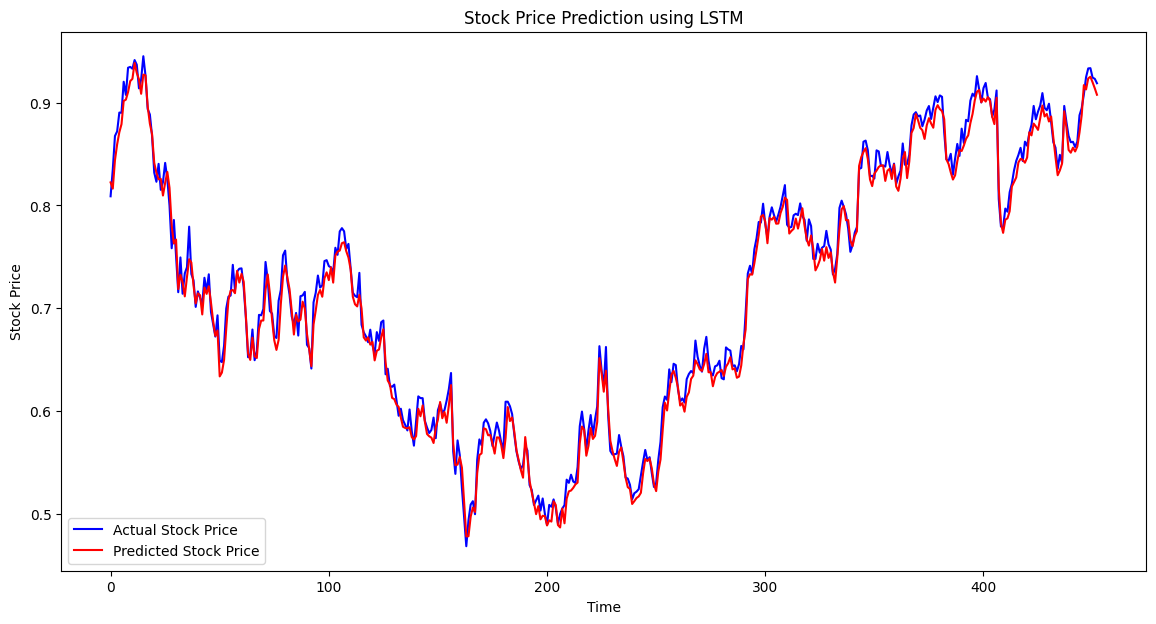

Mean Absolute Percentage Error (MAPE): 0.0135


In [14]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14,7))
plt.plot(y_test_rescaled, label='Actual Stock Price', color='blue')  # Actual values
plt.plot(lstm_predictions_rescaled, label='Predicted Stock Price', color='red')  # Predicted values
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_rescaled, lstm_predictions_rescaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")


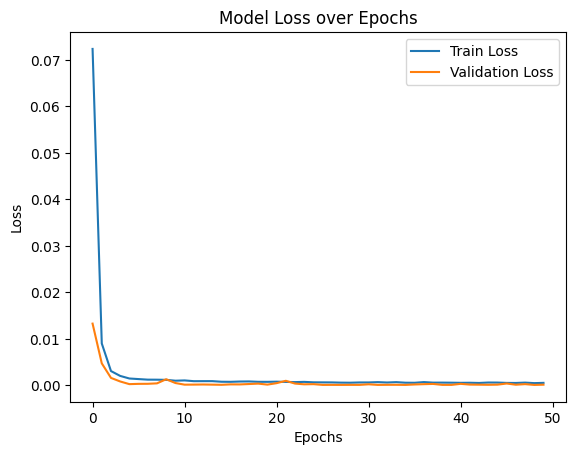

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
import joblib

# Assuming your Linear Regression model is named lr_model
joblib.dump(lr_model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [17]:
# Assuming your LSTM model is named lstm_model
lstm_model.save('my_model.keras')
